<a href="https://colab.research.google.com/github/AdepuTejaswini9/ADM/blob/main/ADM_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv('/content/Iris.csv')

In [23]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
df.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [25]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [27]:
# Assuming 'df' is your DataFrame containing the Iris dataset
X = df.drop('Species', axis=1)  # Extract features, excluding the 'Species' column
y = df['Species']  # Extract the target variable ('Species')
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Create X_scaled here

# Apply PCA to reduce to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create a DataFrame with PCA results
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['Species'] = y

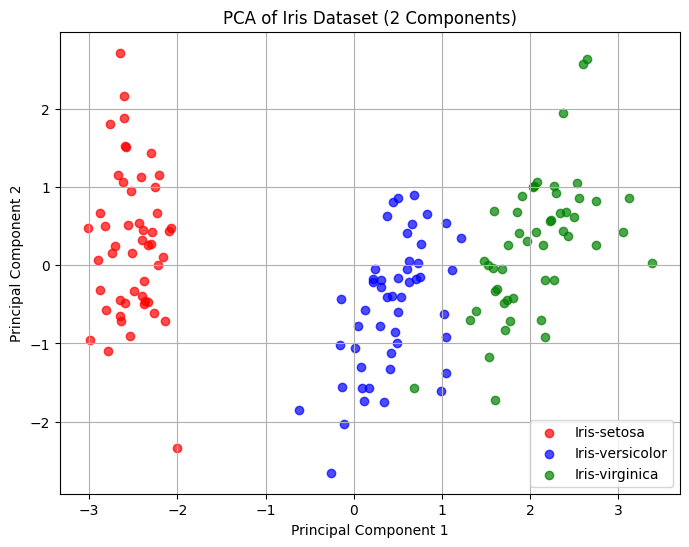

Explained Variance Ratio (2 Components): [0.7470533  0.18435257]


In [28]:
# Plot the PCA-transformed data (2D)
plt.figure(figsize=(8, 6))
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

for species, color in species_colors.items():
    subset = df_pca_2d[df_pca_2d['Species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species, color=color, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2 Components)')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance ratio for 2D PCA
print("Explained Variance Ratio (2 Components):", pca_2d.explained_variance_ratio_)

In [29]:
# Apply PCA to reduce to 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

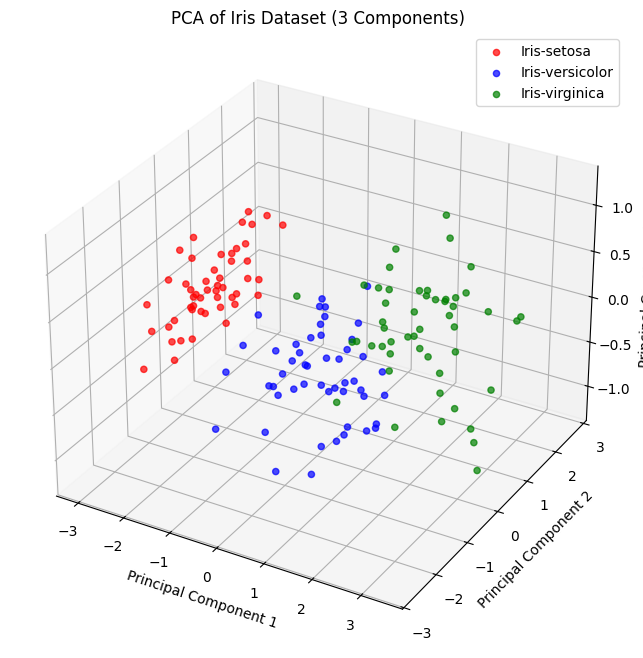

Explained Variance Ratio (3 Components): [0.7470533  0.18435257 0.04682624]


In [30]:
# 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for species, color in species_colors.items():
    subset = X_pca_3d[np.array(y == species)]
    ax.scatter(subset[:, 0], subset[:, 1], subset[:, 2], label=species, color=color, alpha=0.7)

ax.set_title('PCA of Iris Dataset (3 Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

# Print explained variance ratio for 3D PCA
print("Explained Variance Ratio (3 Components):", pca_3d.explained_variance_ratio_)